<a href="https://colab.research.google.com/github/nalini-ajwani/Semantic-Search/blob/main/Semantic_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cohere umap-learn altair annoy datasets tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.0/648.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.5 MB/s eta 0:00:00
  Created wheel for cohere: filename=cohere-3.5.0-cp38-cp38-linux_x86_64.whl size=16265 sha2

In [ ]:
import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [ ]:
api_key = ''
co = cohere.Client(api_key)

# The dataset

In [ ]:
qa_df = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

qa_df

text
0          Where is the world cup?
1        The world cup is in Qatar
2           What color is the sky?
3                  The sky is blue
4        Where does the bear live?
5  The bear lives in the the woods
6                What is an apple?
7              An apple is a fruit

# Creating the embedding

In [ ]:
from cohere import embeddings
qa = co.embed(texts=list(qa_df['text']), model='large', truncate='LEFT').embeddings

# Plotting the embedding in 2D

In [ ]:
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(qa)
df_explore = qa_df
df_explore['x'] = umap_embeds[:,0]
df_explore['y'] = umap_embeds[:,1]

# Plot
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=#'x',
    alt.X('x',
        scale=alt.Scale(zero=False)
    ),
    y=
    alt.Y('y',
        scale=alt.Scale(zero=False)
    ),
    tooltip=['text']
).properties(
    width=700,
    height=400
)
chart.interactive()

alt.Chart(...)

# Plotting the cosine similarities

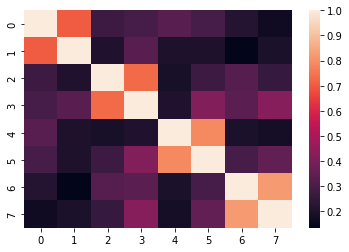

In [ ]:
import seaborn as sb

def plot_similarities(data, embedding):
  similarities = []

  for i in range(len(data)):
    similarities.append([])
    for j in range(len(data)):
      #print(qa_df['text'][i], ',', qa_df['text'][j], '->', cosine_similarity(np.array([qa[i]]), np.array([qa[j]])))
      similarities[-1].append(cosine_similarity(np.array([embedding[i]]), np.array([embedding[j]])))
    #print()

  similarities = np.array(similarities).squeeze()
  #print(similarities)
  sb.heatmap(similarities)

plot_similarities(qa_df, qa)

# A more complicated example

In [ ]:
qa_df_confusing = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'What color is the sky?',
   'Where does the bear live?',
   'What is an apple?',
   'The world cup is in Qatar',
   'The world cup is in the moon',
   'The previous world cup was in Russia',
   'The sky is green',
   'The sky is blue',
   'The bear lives in the the woods',
   'The bear lives in his apartment',
   'An apple is a fruit',
   'Apple is a company'
  ]})

qa_df_confusing

text
0                Where is the world cup?
1                 What color is the sky?
2              Where does the bear live?
3                      What is an apple?
4              The world cup is in Qatar
5           The world cup is in the moon
6   The previous world cup was in Russia
7                       The sky is green
8                        The sky is blue
9        The bear lives in the the woods
10       The bear lives in his apartment
11                   An apple is a fruit
12                    Apple is a company

In [ ]:
from cohere import embeddings
qa_confusing = co.embed(texts=list(qa_df_confusing['text']), model='large', truncate='LEFT').embeddings

In [ ]:
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(qa_confusing)
#df_explore = pd.DataFrame(data={'text': qa['text']})
#print(df_explore)

#df_explore = pd.DataFrame(data={'text': qa_df[0]})
df_explore = qa_df_confusing
df_explore['x'] = umap_embeds[:,0]
df_explore['y'] = umap_embeds[:,1]

# Plot
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=#'x',
    alt.X('x',
        scale=alt.Scale(zero=False)
    ),
    y=
    alt.Y('y',
        scale=alt.Scale(zero=False)
    ),
    tooltip=['text']
).properties(
    width=700,
    height=400
)
chart.interactive()

alt.Chart(...)

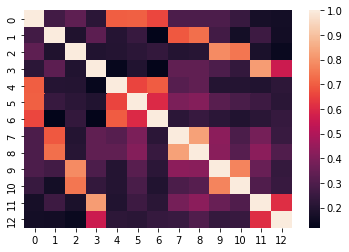

In [ ]:
plot_similarities(qa_df_confusing, qa_confusing)

In [ ]:
1

1